# Pytorch tutorial
## Basics
Tensors in pytorch. x = num_rows, y=num_columns


In [25]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision        
import torchvision.transforms as transforms
import random

In [2]:
a = str(23)
l = [[1,2,3,4,5],["a","b"],[5,6,7]]
b = "erik"
c = a + b
print(c)
print(l[:1,1])

23erik


TypeError: list indices must be integers or slices, not tuple

In [120]:
def util_random_tens(tup):   
    class Inner(): 
        no = 2        
        def __init__():
            pass           
            
        @staticmethod
        def aux_inner(tup,no_call=5):
            
            if len(tup) == 1:
                Inner.no += 1
                s = no_call            
                random.seed(s)
                rand_list = random.sample(range(0,100),tup[0])            
                return rand_list        
            else:
                l = []
                for i in range(tup[0]):
                    Inner.no += 1
                    no_call += 1
                    l.append(Inner.aux_inner(tup[1:],no_call=Inner.no))
                return l
            
    
    return Inner.aux_inner(tup)
        

ex_tens = torch.tensor(util_random_tens((1,2,5,3,3)))
tensList = [torch.tensor(util_random_tens((5,3,3)))] * 2
print("Tenslist sizes:",tensList[0].size())
print("tenslist:",tensList)
stacked1 = torch.stack(tensList,3)
print("Stacked 1 Size:",stacked1.size())
print("Stacked:",stacked1)
print(ex_tens.size())
print(ex_tens)
split = list(torch.split(ex_tens,int(ex_tens.size(1)/ex_tens.size(1)),dim=1))
print("Split:",split)
stacked = torch.stack(split,5).squeeze()name
print("Stacked:",stacked)

print("Stacked size:",stacked.size())
print("ex_tens view:",ex_tens.view(1,45,-1))
print("stacked view:",stacked.view(1,45,-1))
print("Stacked 1 view:",stacked1.view(1,45,-1))
        


Tenslist sizes: torch.Size([5, 3, 3])
tenslist: [tensor([[[ 30,  38,  13],
         [ 73,  10,  62],
         [ 29,  47,  48]],

        [[ 57,  71,  99],
         [ 33,  37,  87],
         [ 26,   1,  66]],

        [[ 23,  15,  84],
         [ 92,  87,  98],
         [ 17,  31,   3]],

        [[ 48,  98,   1],
         [ 83,  61,  89],
         [ 70,   9,  44]],

        [[  9,  27,  18],
         [ 67,  45,  74],
         [ 42,   7,   2]]]), tensor([[[ 30,  38,  13],
         [ 73,  10,  62],
         [ 29,  47,  48]],

        [[ 57,  71,  99],
         [ 33,  37,  87],
         [ 26,   1,  66]],

        [[ 23,  15,  84],
         [ 92,  87,  98],
         [ 17,  31,   3]],

        [[ 48,  98,   1],
         [ 83,  61,  89],
         [ 70,   9,  44]],

        [[  9,  27,  18],
         [ 67,  45,  74],
         [ 42,   7,   2]]])]
Stacked 1 Size: torch.Size([5, 3, 3, 2])
Stacked: tensor([[[[ 30,  30],
          [ 38,  38],
          [ 13,  13]],

         [[ 73,  73],
         

Demonstration of dimensions

In [127]:
sh = torch.rand(1,5,3,2)
print(sh)
print("Size:", sh.size())
print(sh[:,:2,0])

tensor([[[[ 0.9795,  0.0437],
          [ 0.6934,  0.3181],
          [ 0.1216,  0.8136]],

         [[ 0.6256,  0.9458],
          [ 0.6875,  0.5891],
          [ 0.2683,  0.5889]],

         [[ 0.4347,  0.4364],
          [ 0.6285,  0.8506],
          [ 0.6217,  0.1045]],

         [[ 0.4277,  0.5513],
          [ 0.1635,  0.0882],
          [ 0.1174,  0.1637]],

         [[ 0.1236,  0.2208],
          [ 0.2796,  0.9796],
          [ 0.3950,  0.8690]]]])
Size: torch.Size([1, 5, 3, 2])
tensor([[[ 0.9795,  0.0437],
         [ 0.6256,  0.9458]]])


In [30]:
x = torch.rand(5,3)
zeros = torch.zeros(3,5,dtype = torch.long)
print(x)
print(zeros)
print(torch.max(x))

tensor([[ 0.4439,  0.4826,  0.7466],
        [ 0.5812,  0.9706,  0.9643],
        [ 0.3979,  0.4532,  0.1923],
        [ 0.2714,  0.1722,  0.5221],
        [ 0.7439,  0.9141,  0.5705]])
tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])
tensor(0.9706)


Initializing tensors directly from data and priting its size


In [31]:
data = [[1,2,3],[4,5,6]]
data_t = torch.tensor(data)
print(data_t)
print(data_t.size() == torch.Size([2,3]))
print(9-data_t)
print()

tensor([[ 1,  2,  3],
        [ 4,  5,  6]])
True
tensor([[ 8,  7,  6],
        [ 5,  4,  3]])


### Eye ###

In [29]:
eye = torch.eye(3)
print(eye)
print(eye[:,:,None])


tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])
tensor([[[ 1.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 1.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 1.]]])
3


### Arithmetic operations

In [29]:
x = torch.tensor([[1,2,3],[10,11,13]])
y = torch.tensor([[5,6,7],[20,21,22]])
trans = torch.tensor([[[5,6,7],[20,21,22]]])
trans1 = torch.tensor([[1,2,3],[10,11,13]])
mm1 = torch.tensor([[1,2],[4,3]]).double()
mm2 = torch.tensor([[2,3]]).double()
mmmm = torch.matmul(mm2,mm1)
print("Resutl of matrix multiply 1: \n",mmmm)


print("Normal multiply:\n")
print(mm1*mm2)

print("Square root and sum: \n")
z = torch.sqrt(mm1**2).sum(-2)
print(z)

print("Two different transposes")
print("Original dim: {}".format(trans.size()))
print(trans.transpose(0,1))
print(trans.transpose(0,1).size())
print(trans.transpose(2,0))
print(trans.transpose(2,0).size())
print("trans1.t()")
print(trans1.t())
print("\n\n")

print("Matrix multiply:")
print(x.mm(y.transpose(0,1)))

print("Addition normal")
print(x+y)

print("Addition with pytorch function")
print(torch.add(x,y))

print("Addition with providing output tensor")
result = torch.zeros(2,3, dtype = torch.long)
torch.add(x,y,out=result)
print(result)

print("Addition in place (x is changed in this example)")
x.add_(y)
print(x)


Resutl of matrix multiply 1: 
 tensor([[ 14.,  13.]], dtype=torch.float64)
Normal multiply:

tensor([[ 2.,  6.],
        [ 8.,  9.]], dtype=torch.float64)
Square root and sum: 

tensor([ 5.,  5.], dtype=torch.float64)
Two different transposes
Original dim: torch.Size([1, 2, 3])
tensor([[[  5,   6,   7]],

        [[ 20,  21,  22]]])
torch.Size([2, 1, 3])
tensor([[[  5],
         [ 20]],

        [[  6],
         [ 21]],

        [[  7],
         [ 22]]])
torch.Size([3, 2, 1])
trans1.t()
tensor([[  1,  10],
        [  2,  11],
        [  3,  13]])



Matrix multiply:
tensor([[  38,  128],
        [ 207,  717]])
Addition normal
tensor([[  6,   8,  10],
        [ 30,  32,  35]])
Addition with pytorch function
tensor([[  6,   8,  10],
        [ 30,  32,  35]])
Addition with providing output tensor
tensor([[  6,   8,  10],
        [ 30,  32,  35]])
Addition in place (x is changed in this example)
tensor([[  6,   8,  10],
        [ 30,  32,  35]])


__NOTE:__ Operations that mutate a tensor in place are post ficed with "_"

### Addressing elements in tensor

In [71]:
rn = torch.rand(7,4)
print(rn)
print("Column 0")
print(rn[:,0])
print("Row 0")
print(rn[0,:])
print("Second and third row and second and third column")
print(rn[1:3,1:3])

tensor([[ 0.2587,  0.6451,  0.4262,  0.4482],
        [ 0.4279,  0.7340,  0.0909,  0.3557],
        [ 0.8988,  0.3604,  0.7420,  0.6601],
        [ 0.9830,  0.1302,  0.7470,  0.7972],
        [ 0.3061,  0.2687,  0.5608,  0.5939],
        [ 0.4654,  0.0722,  0.2099,  0.4110],
        [ 0.1090,  0.5451,  0.1950,  0.5889]])
Column 0
tensor([ 0.2587,  0.4279,  0.8988,  0.9830,  0.3061,  0.4654,  0.1090])
Row 0
tensor([ 0.2587,  0.6451,  0.4262,  0.4482])
Second and third row and second and third column
tensor([[ 0.7340,  0.0909],
        [ 0.3604,  0.7420]])


### Resizing torch tensors

In [72]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
v = x.view(1,-1)
print(x.size(),"\n",x)
print(y.size(),"\n",y)
print(z.size(),"\n",z)
print(v.size(),"\n",v)


torch.Size([4, 4]) 
 tensor([[-0.5736,  0.8739,  1.1581, -0.4651],
        [-1.2898, -2.0091,  0.0448, -0.7776],
        [ 0.2598,  0.6121,  0.4177,  0.5769],
        [ 0.5912,  0.5000,  2.4781,  0.4546]])
torch.Size([16]) 
 tensor([-0.5736,  0.8739,  1.1581, -0.4651, -1.2898, -2.0091,  0.0448,
        -0.7776,  0.2598,  0.6121,  0.4177,  0.5769,  0.5912,  0.5000,
         2.4781,  0.4546])
torch.Size([2, 8]) 
 tensor([[-0.5736,  0.8739,  1.1581, -0.4651, -1.2898, -2.0091,  0.0448,
         -0.7776],
        [ 0.2598,  0.6121,  0.4177,  0.5769,  0.5912,  0.5000,  2.4781,
          0.4546]])
torch.Size([1, 16]) 
 tensor([[-0.5736,  0.8739,  1.1581, -0.4651, -1.2898, -2.0091,  0.0448,
         -0.7776,  0.2598,  0.6121,  0.4177,  0.5769,  0.5912,  0.5000,
          2.4781,  0.4546]])


## Stacking Tensors ##

In [135]:
d = torch.rand(2,3,4)
print(d)
stacked = torch.stack([d] * 2,dim=2).unsqueeze(4)
print(stacked)

tensor([[[ 0.2574,  0.3589,  0.2550,  0.0728],
         [ 0.6585,  0.1817,  0.2356,  0.6970],
         [ 0.7150,  0.0318,  0.9021,  0.9439]],

        [[ 0.6977,  0.5638,  0.4860,  0.2753],
         [ 0.2124,  0.6545,  0.7921,  0.1981],
         [ 0.0606,  0.8532,  0.7955,  0.3575]]])
tensor([[[[[ 0.2574],
           [ 0.3589],
           [ 0.2550],
           [ 0.0728]],

          [[ 0.2574],
           [ 0.3589],
           [ 0.2550],
           [ 0.0728]]],


         [[[ 0.6585],
           [ 0.1817],
           [ 0.2356],
           [ 0.6970]],

          [[ 0.6585],
           [ 0.1817],
           [ 0.2356],
           [ 0.6970]]],


         [[[ 0.7150],
           [ 0.0318],
           [ 0.9021],
           [ 0.9439]],

          [[ 0.7150],
           [ 0.0318],
           [ 0.9021],
           [ 0.9439]]]],



        [[[[ 0.6977],
           [ 0.5638],
           [ 0.4860],
           [ 0.2753]],

          [[ 0.6977],
           [ 0.5638],
           [ 0.4860],
          

In [73]:
stack1 = tens = torch.tensor([[[[1,2],[3,4]]],[[[5,6],[7,8]]],[[[9,10],[11,12]]]])
stack2 = tens = torch.tensor([[[[11,22],[33,44]]],[[[1,2],[3,4]]],[[[1,2],[3,4]]]])
ls = [stack1, stack2]
print("Tensor 1:")
print(stack1)
print("Tensor 2:")
print(stack2)
print("------------------")
print("Stacked tensors:")
stacked = torch.stack(ls,1) 
print(stacked)
print("Tensor sizes:",stack1.size())
print("Stacked sizes:",stacked.size())

Tensor 1:
tensor([[[[  1,   2],
          [  3,   4]]],


        [[[  5,   6],
          [  7,   8]]],


        [[[  9,  10],
          [ 11,  12]]]])
Tensor 2:
tensor([[[[ 11,  22],
          [ 33,  44]]],


        [[[  1,   2],
          [  3,   4]]],


        [[[  1,   2],
          [  3,   4]]]])
------------------
Stacked tensors:
tensor([[[[[  1,   2],
           [  3,   4]]],


         [[[ 11,  22],
           [ 33,  44]]]],



        [[[[  5,   6],
           [  7,   8]]],


         [[[  1,   2],
           [  3,   4]]]],



        [[[[  9,  10],
           [ 11,  12]]],


         [[[  1,   2],
           [  3,   4]]]]])
Tensor sizes: torch.Size([3, 1, 2, 2])
Stacked sizes: torch.Size([3, 2, 1, 2, 2])


## Some Soft Max understanding ##

In [24]:
te1 = torch.zeros([2,3,1])
te2 = torch.zeros([2,2])
exmpl1 = torch.tensor([[[1],[2]],[[3],[4]]],dtype=torch.float)
exml2 = torch.tensor([1,2,3,4], dtype=torch.float)
print(te1)
softmax = F.softmax(exmpl1,dim = 0)
sm2 = F.softmax(exml2,dim=0)
print(softmax)
print(sm2)

tensor([[[ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.]]])
tensor([[[ 0.1192],
         [ 0.1192]],

        [[ 0.8808],
         [ 0.8808]]])
tensor([ 0.0321,  0.0871,  0.2369,  0.6439])


### Squashing function ###

In [38]:
tens = torch.tensor([[[1,2,3],[2,1,3],[2,1,3]],[[10,20,30],[20,10,30],[20,10,30]]]).double()
print(tens.size())
CapsSquareNorm = tens.sum(1,keepdim=True)
CapsSum = torch.sqrt(CapsSquareNorm)
CapsOut = CapsSquareNorm*tens/(1+CapsSquareNorm*CapsSum)

print(CapsSquareNorm)
print(CapsSum)
print(CapsOut)

torch.Size([2, 3, 3])
tensor([[[  5.,   4.,   9.]],

        [[ 50.,  40.,  90.]]], dtype=torch.float64)
tensor([[[ 2.2361,  2.0000,  3.0000]],

        [[ 7.0711,  6.3246,  9.4868]]], dtype=torch.float64)
tensor([[[ 0.4105,  0.8889,  0.9643],
         [ 0.8210,  0.4444,  0.9643],
         [ 0.8210,  0.4444,  0.9643]],

        [[ 1.4102,  3.1498,  3.1586],
         [ 2.8204,  1.5749,  3.1586],
         [ 2.8204,  1.5749,  3.1586]]], dtype=torch.float64)


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

## Matrix multiplications (in batch learning) ##
Input data has dimensions `[batch,in,hidden,out]`. Lets say is 1 hidden layer 

In [92]:
data = torch.rand(3,2).double()
print(data)
weight_matrix1 = torch.tensor([[2,2,2],[5,5,5]]).double()
print(weight_matrix1)
weight_matrix2 = torch.tensor([[2,2,2,2,2],[5,5,5,5,5],[10,10,10,10,10]]).double()
print(weight_matrix2)
prod1 = data.mm(weight_matrix1)
prod2 = prod1.mm(weight_matrix2)
print("\n\nResult of FIRST multiplication:")
print(prod1)
print("\n\nResult of SECOND multiplication:")
print(prod2)

tensor([[ 0.1063,  0.1369],
        [ 0.7666,  0.7842],
        [ 0.4955,  0.6879]], dtype=torch.float64)
tensor([[ 2.,  2.,  2.],
        [ 5.,  5.,  5.]], dtype=torch.float64)
tensor([[  2.,   2.,   2.,   2.,   2.],
        [  5.,   5.,   5.,   5.,   5.],
        [ 10.,  10.,  10.,  10.,  10.]], dtype=torch.float64)


Result of FIRST multiplication:
tensor([[ 0.8972,  0.8972,  0.8972],
        [ 5.4540,  5.4540,  5.4540],
        [ 4.4307,  4.4307,  4.4307]], dtype=torch.float64)


Result of SECOND multiplication:
tensor([[ 15.2529,  15.2529,  15.2529,  15.2529,  15.2529],
        [ 92.7180,  92.7180,  92.7180,  92.7180,  92.7180],
        [ 75.3217,  75.3217,  75.3217,  75.3217,  75.3217]], dtype=torch.float64)


## Autograd and gradients

In [75]:
x1 = torch.ones(2, 3, requires_grad=True)
print(x1)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


Doing an operation on a tensor:

In [77]:
y1 = x1 + 2
print(y1)
print(y1.grad_fn)

tensor([[ 3.,  3.,  3.],
        [ 3.,  3.,  3.]])
None


y is a result of a function thus it has a __.grad_fn__ attribute which specifies the which function it is result of.

In [78]:
z1 = y1 * y1 * 3
out = z1.mean()

print(z1)
print(z1.grad_fn)
print(out)

tensor([[ 27.,  27.,  27.],
        [ 27.,  27.,  27.]])
tensor(27.)


Geting gradients of __out__ :

In [10]:
out.backward(retain_graph = False)
print(x1.grad)

tensor([[ 3.,  3.,  3.],
        [ 3.,  3.,  3.]])


In [6]:
x2 = torch.randn(3,requires_grad=True)
print(x2)

y2 = x2 * 2
while y2.data.norm() < 1000:
    y2 = y2 * 2

print(y2)

tensor([-1.1275,  0.2828, -0.1401])
tensor([-1154.5289,   289.5901,  -143.4415])


In [12]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y2.backward(gradients)

print(x2.grad)

tensor([  102.4000,  1024.0000,     0.1024])


__Example from CS231n__

In [7]:
a1 = torch.tensor(2,requires_grad=True,dtype=torch.float64)
b1 = torch.tensor(-1,requires_grad=True,dtype=torch.float64)
a2 = torch.tensor(-3,requires_grad=True,dtype=torch.float64)
b2 = torch.tensor(-2,requires_grad=True,dtype=torch.float64)
c1 = torch.tensor(-3,requires_grad=True,dtype=torch.float64)

prod1 = a1 * b1
prod2 = a2 * b2
print(prod1)
print(prod2)

sum1 = prod1 + prod2
print(sum1)

sum2 = sum1 + c1

print(sum2)
sum2 = sum2 * (-1)
print(sum2)
sum2 = torch.exp(sum2.double())
print(sum2)
sum2 = sum2 + 1
print(sum2)
sum2 = 1/sum2
print(sum2)
print("Gradients:")
grads = torch.tensor([1,0.1],dtype=torch.double)
sum2.backward(grads)


print(a1.grad)
print(b1.grad)
print(a2.grad)
print(b2.grad)
print(c1.grad)





tensor(-2., dtype=torch.float64)
tensor(6., dtype=torch.float64)
tensor(4., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(-1., dtype=torch.float64)
tensor(0.3679, dtype=torch.float64)
tensor(1.3679, dtype=torch.float64)
tensor(0.7311, dtype=torch.float64)
Gradients:
tensor([-0.1966, -0.0197], dtype=torch.float64)
tensor([ 0.3932,  0.0393], dtype=torch.float64)
tensor([-0.3932, -0.0393], dtype=torch.float64)
tensor([-0.5898, -0.0590], dtype=torch.float64)
tensor([ 0.1966,  0.0197], dtype=torch.float64)


## Networks


In [8]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


__Learnable parameters of the network :__

In [10]:
params = list(net.parameters())
for i in params:
    print(i.size())
print(len(params))
print(params[0].size())

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])
10
torch.Size([6, 1, 5, 5])


__Inputing a random 32x32 tensor__

In [11]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0481, -0.0928, -0.0783, -0.0048, -0.0606,  0.1002,  0.0634,
         -0.0067,  0.0828, -0.1136]])


torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension

__Computing the loss function__

In [17]:

target = torch.arange(1, 11)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)
print(loss.grad_fn)

tensor(39.6173)


In [18]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

__BAckpropagation of the error__

In [19]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0198,  0.0075,  0.0763,  0.1378, -0.0207,  0.1505])


In [20]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## CIFAR-10 classifier example

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


__SHOWING SOME IMAGES__

horse horse   dog  deer


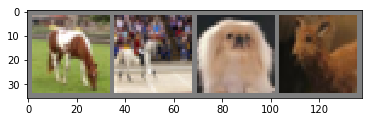

In [22]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

__DEFINE THE NETWORK__

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

__DEFINE LOSS AND OPTIMIZER__

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

__TRAIN THE NETWORK__

In [25]:
for epoch in range(3):  # loop over the dataset 3 times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.205
[1,  4000] loss: 1.903
[1,  6000] loss: 1.735
[1,  8000] loss: 1.603
[1, 10000] loss: 1.519
[1, 12000] loss: 1.477
[2,  2000] loss: 1.433
[2,  4000] loss: 1.373
[2,  6000] loss: 1.385
[2,  8000] loss: 1.350
[2, 10000] loss: 1.321
[2, 12000] loss: 1.277
[3,  2000] loss: 1.229
[3,  4000] loss: 1.222
[3,  6000] loss: 1.192
[3,  8000] loss: 1.201
[3, 10000] loss: 1.172
[3, 12000] loss: 1.172
Finished Training


__TESTING AGAINST TRAINING DATA__

In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 79 %
Accuracy of  bird : 60 %
Accuracy of   cat : 45 %
Accuracy of  deer : 40 %
Accuracy of   dog : 27 %
Accuracy of  frog : 68 %
Accuracy of horse : 63 %
Accuracy of  ship : 68 %
Accuracy of truck : 63 %
